In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

tables = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96', attrs={"caption": ""})
table = tables[16]
table.head()

,регіон,1950,1960,1970,1990,1992,1994,1996,2000,2004,2008,2012,2014
0,Автономна Республіка Крим,230.0,206.0,160.0,130,109,93,80,73,90,119,126,NaN
1,Вінницька область,224.0,192.0,142.0,124,119,107,103,84,90,108,112,109.0
2,Волинська область,247.0,250.0,179.0,153,150,137,125,112,119,148,148,141.0
3,Дніпропетровська область,204.0,204.0,151.0,123,106,92,80,71,89,110,112,111.0
4,Донецька область,271.0,214.0,140.0,109,94,82,70,61,76,98,98,82.0


In [3]:
table.shape

(28, 13)

In [4]:
table.replace('—', np.nan, inplace=True)

In [5]:
table.dtypes

регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
1992        int64
1994        int64
1996        int64
2000        int64
2004        int64
2008        int64
2012        int64
2014      float64
dtype: object

In [6]:
table['1950'].apply(pd.to_numeric)
table['1960'].apply(pd.to_numeric)
table['1970'].apply(pd.to_numeric)
table['2014'].apply(pd.to_numeric)

0       NaN
1     109.0
2     141.0
3     111.0
4      82.0
5     120.0
6     146.0
7     106.0
8     122.0
9     121.0
10    108.0
11     51.0
12    119.0
13    112.0
14    123.0
15    100.0
16    148.0
17     92.0
18    109.0
19    101.0
20    115.0
21    112.0
22     98.0
23    129.0
24     90.0
25    121.0
26      NaN
27    108.0
Name: 2014, dtype: float64

In [7]:
table.isnull().sum()

регіон    0
1950      2
1960      1
1970      1
1990      0
1992      0
1994      0
1996      0
2000      0
2004      0
2008      0
2012      0
2014      2
dtype: int64

In [8]:
table.drop([27], inplace=True)

In [9]:
values = {'1950': table['1950'].mean(),'1960': table['1960'].mean(),'1970': table['1970'].mean(),'2014': table['2014'].mean()}
table.fillna(values, inplace=True)

In [10]:
print(table[table["2014"]>table['2014'].mean()]['регіон'])

2             Волинська область
5           Житомирська область
6          Закарпатська область
8     Івано-Франківська область
9              Київська область
12            Львівська область
13         Миколаївська область
14              Одеська область
16           Рівненська область
20           Херсонська область
21          Хмельницька область
23          Чернівецька область
25                         Київ
Name: регіон, dtype: object


In [11]:
print(table[table["2014"]==table['2014'].max()]['регіон'])

16    Рівненська область
Name: регіон, dtype: object


Text(0.5, 1.0, 'Діаграма народжуваності по регіонах у 2014 році')

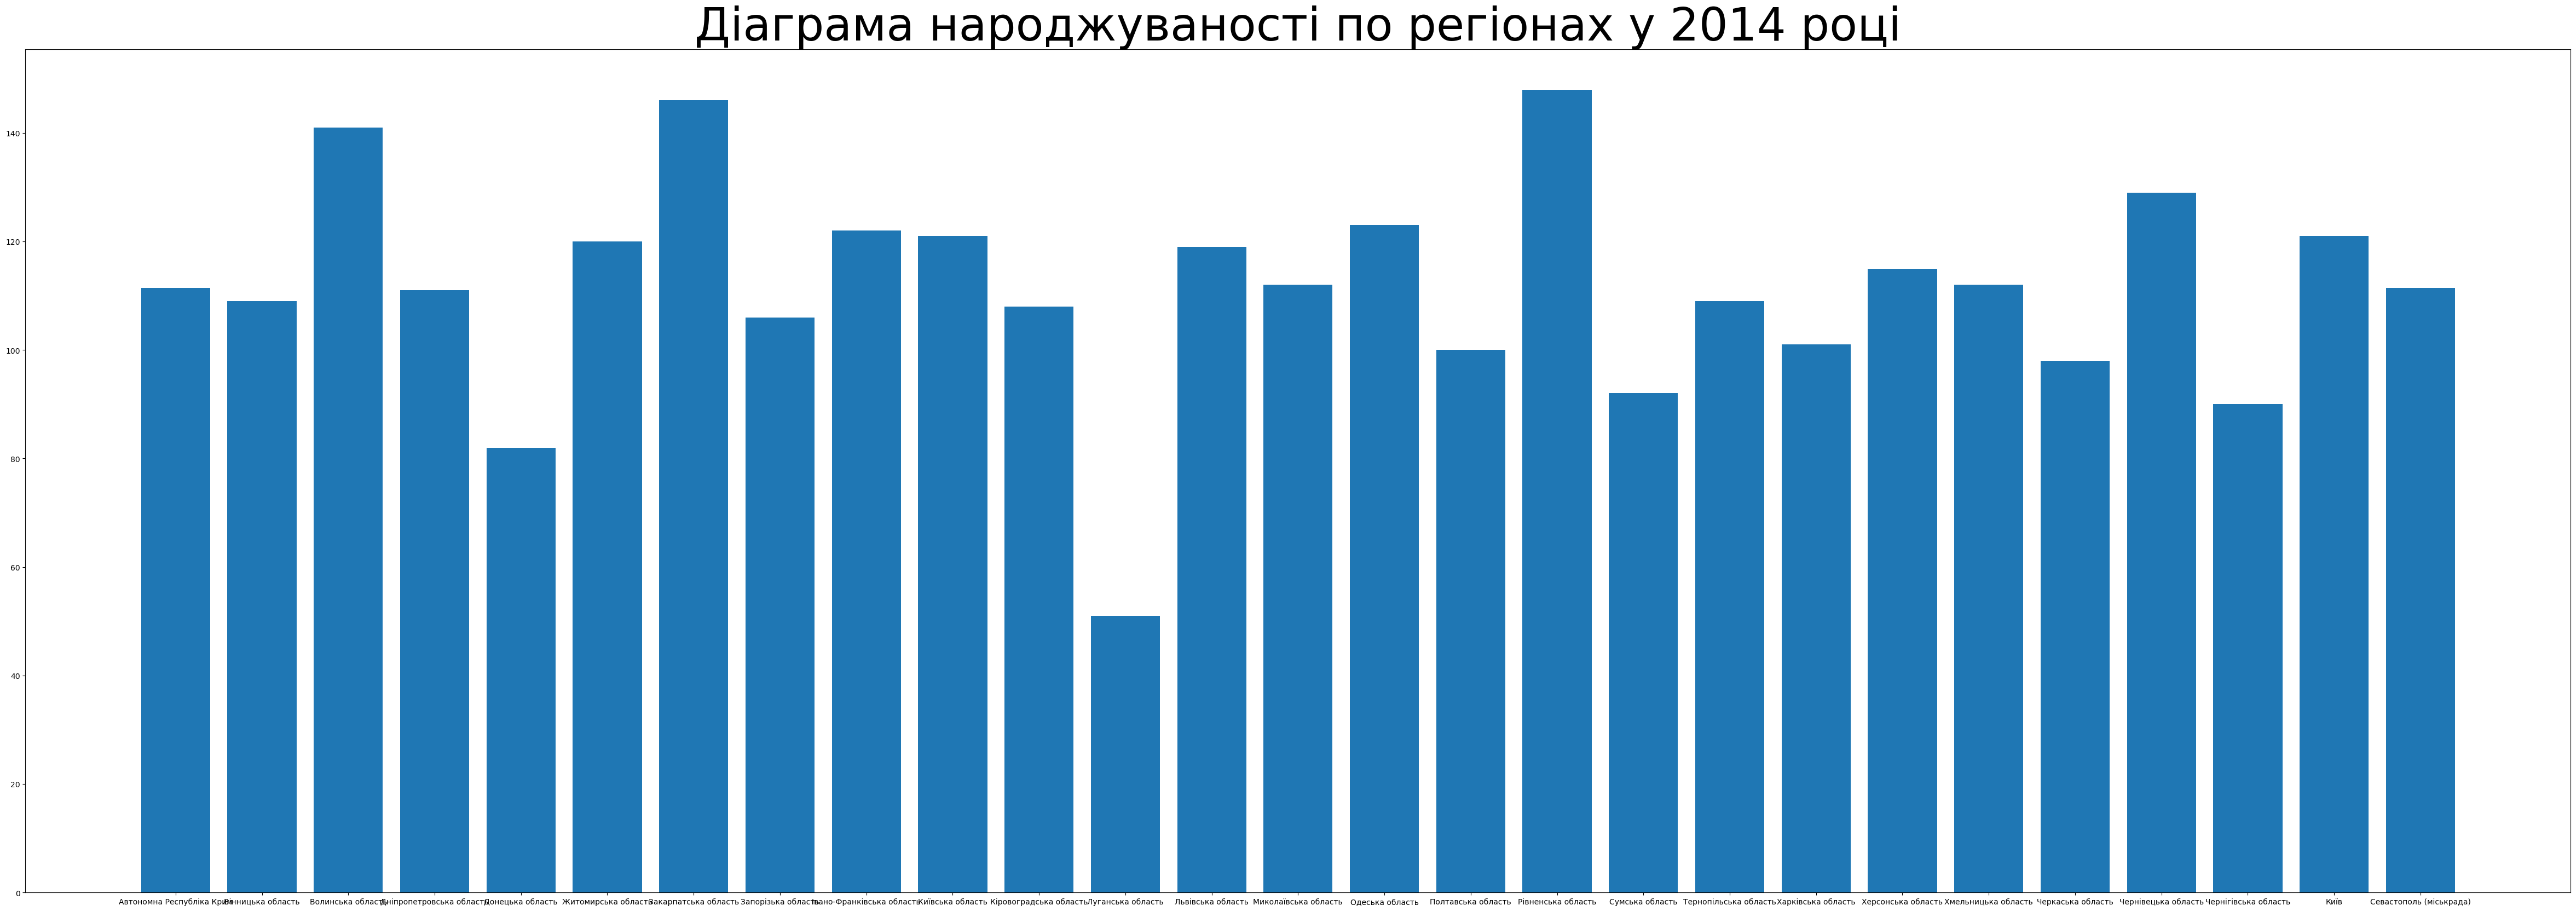

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(60, 20))
ax.bar(
    table['регіон'],
    table['2014'],
)
plt.title("Діаграма народжуваності по регіонах у 2014 році", fontsize=60)

Text(0, 0.5, 'Народжуваность')

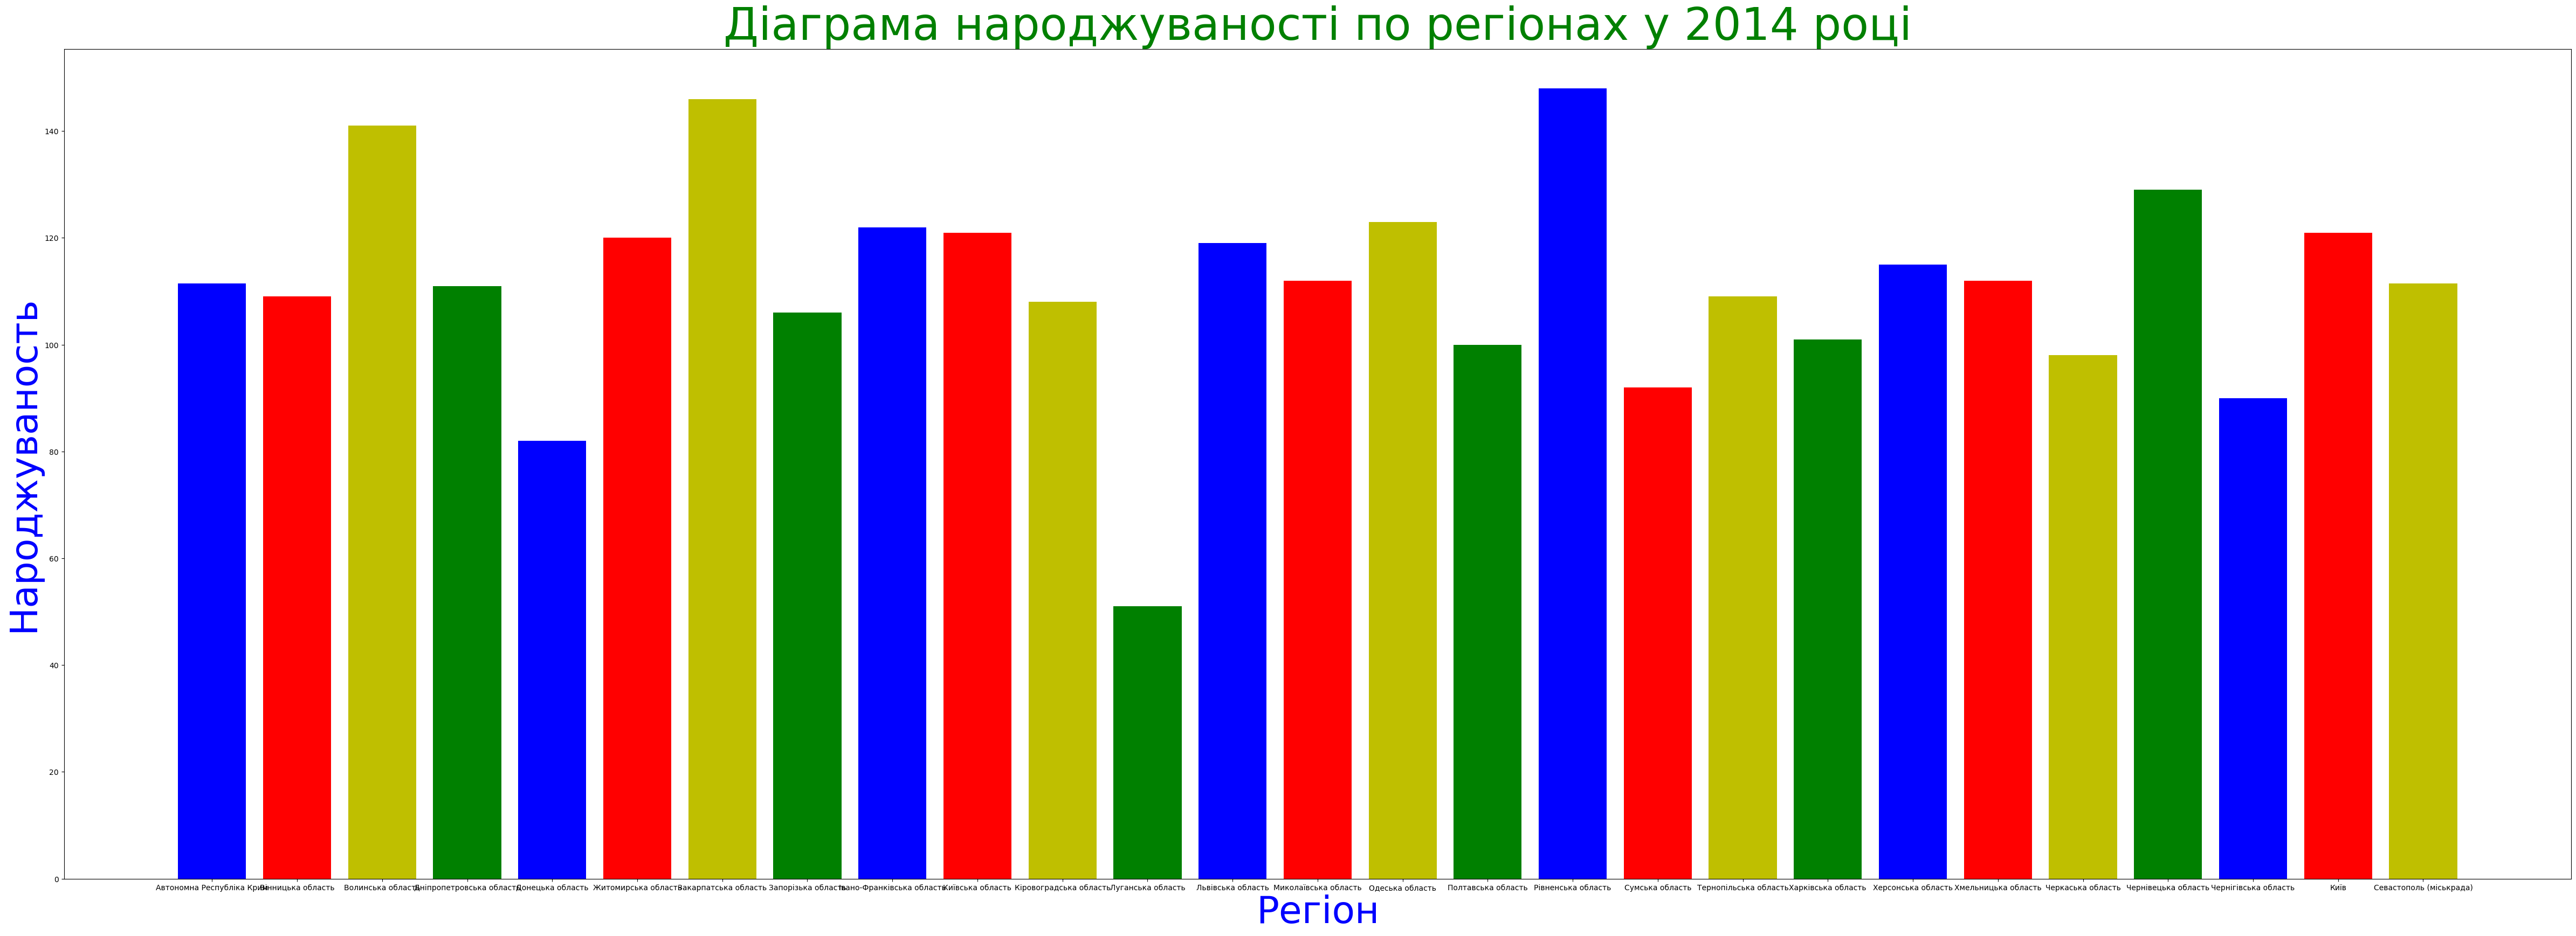

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(60, 20))
ax.bar(
    table['регіон'],
    table['2014'],
    color=["b", "r", "y", "g"],
)
plt.title("Діаграма народжуваності по регіонах у 2014 році", fontsize=60, color="g")
plt.xlabel("Регіон", fontsize=50, color="b")
plt.ylabel("Народжуваность", fontsize=50, color="b")

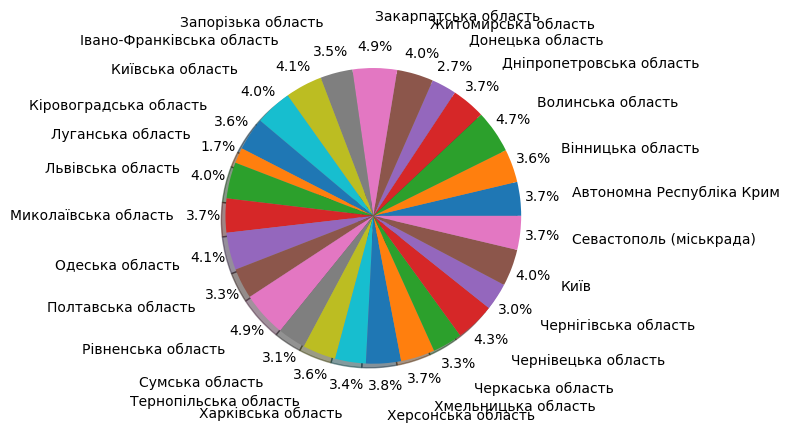

In [14]:
labels = table['регіон']
data = table['2014']

plt.pie(
    data,
    labels=labels,
    shadow=True,
    autopct="%.1f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)
plt.show()

Text(0, 0.5, 'Народжуваность')

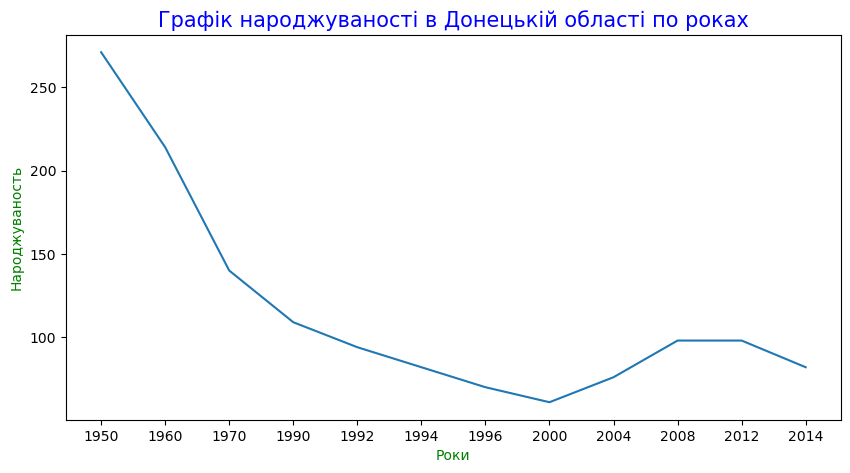

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    table.columns[1:],    
    table.loc[4][1:],
)
plt.title("Графік народжуваності в Донецькій області по роках", fontsize=15, color="b")
plt.xlabel("Роки", fontsize=10, color="g")
plt.ylabel("Народжуваность", fontsize=10, color="g")